In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cidades = pd.read_excel('./BRCidadesRegiao.xlsx')


In [66]:
len(cidades)

5536

In [ ]:
cidades

In [ ]:
colunas = cidades.columns
df = pd.DataFrame()
df['colunas'] = colunas
df.info()

In [67]:
data = cidades[cidades.columns]
data.corr()

/tmp/ipykernel_1446/1347473138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,codigo,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,...,GVA_agropecuaria,GVA_industria,GVA_Servicos,GVA_publico,GDP,GDP_populacao,GDP_per_capita,estabelecimentos,carros,motos
Unnamed: 0.2,1.000000,1.000000,0.999928,-0.167387,-0.045324,0.050152,0.108933,-0.004589,0.080884,-0.033395,...,-0.088928,0.062614,0.042501,0.054302,0.047616,0.048888,-0.021050,0.039116,0.047875,0.049613
Unnamed: 0,1.000000,1.000000,0.999928,-0.167387,-0.045324,0.050152,0.108933,-0.004589,0.080884,-0.033395,...,-0.088928,0.062614,0.042501,0.054302,0.047616,0.048888,-0.021050,0.039116,0.047875,0.049613
Unnamed: 0.1,0.999928,0.999928,1.000000,-0.169152,-0.044047,0.049837,0.108439,-0.005585,0.080074,-0.033858,...,-0.089474,0.062240,0.042189,0.053925,0.047338,0.048570,-0.021755,0.038776,0.047567,0.049316
codigo,-0.167387,-0.167387,-0.169152,1.000000,-0.155941,-0.002638,0.011792,0.269259,0.602779,-0.034977,...,0.198761,0.028591,0.021249,0.004726,0.021121,-0.003023,0.387529,0.030336,0.033236,-0.003634
area_territorial,-0.045324,-0.045324,-0.044047,-0.155941,1.000000,0.018808,-0.040665,-0.423273,-0.131969,-0.110390,...,0.207072,0.004757,0.000532,0.016821,0.005116,0.017991,-0.017510,0.000209,-0.001998,0.036942
populacao_estimada,0.050152,0.050152,0.049837,-0.002638,0.018808,1.000000,0.439758,-0.021054,0.143241,-0.127078,...,0.064983,0.892248,0.939396,0.857962,0.943156,0.999876,0.079382,0.959106,0.965274,0.942928
densidade_demografica,0.108933,0.108933,0.108439,0.011792,-0.040665,0.439758,1.000000,-0.003000,0.177783,-0.089117,...,-0.046905,0.356611,0.338714,0.435718,0.330290,0.439960,0.088076,0.361300,0.385317,0.418166
escolarizacao,-0.004589,-0.004589,-0.005585,0.269259,-0.423273,-0.021054,-0.003000,1.000000,0.368826,0.079871,...,-0.072594,0.000665,-0.004247,-0.016079,-0.005999,-0.020526,0.122342,-0.000491,-0.000348,-0.011669
idhm,0.080884,0.080884,0.080074,0.602779,-0.131969,0.143241,0.177783,0.368826,1.000000,-0.106400,...,0.180036,0.176860,0.104415,0.150549,0.112025,0.141556,0.501004,0.141778,0.146658,0.189599
mortalidade_infantil,-0.033395,-0.033395,-0.033858,-0.034977,-0.110390,-0.127078,-0.089117,0.079871,-0.106400,1.000000,...,-0.154353,-0.108433,-0.075950,-0.112287,-0.092188,-0.126160,-0.083205,-0.091400,-0.077554,-0.142778


In [ ]:
data.info()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [77]:
quantidadeCarrosCidade = cidades[['carros']]
quantidadeMotosCidade = cidades[['motos']]
for i in quantidadeCarrosCidade :
    for j in quantidadeMotosCidade :
        veiculos = quantidadeCarrosCidade[i] + quantidadeMotosCidade[j]
cidades['veiculos'] = veiculos
cidades

vif = cidades[
    [
        'area_territorial',
        'populacao_estimada',
        'idhm',
        'unidades_rurais',
        'unidades_urbanas',
        'veiculos'
    ]
]

# Replace infinite updated data with nan
vif.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
vif.dropna(inplace=True)

vif_data = pd.DataFrame()

vif_data['variavel'] = vif.columns
vif_data['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(len(vif.columns))]
vif_data

/tmp/ipykernel_1446/1444397244.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_1446/1444397244.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif.dropna(inplace=True)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [74]:
limite_inferior=cidades['area_territorial'].mean() - (
    1.96 * cidades['area_territorial'].std() / np.sqrt(len(cidades['area_territorial']))
)

print(limite_inferior)

1376.3545649916207


In [75]:
limite_superior=cidades['area_territorial'].mean() + (
    1.96 * cidades['area_territorial'].std() / np.sqrt(len(cidades['area_territorial']))
)

print(limite_superior)

1672.43972185809


In [ ]:
cidades

<Axes: ylabel='area_territorial'>

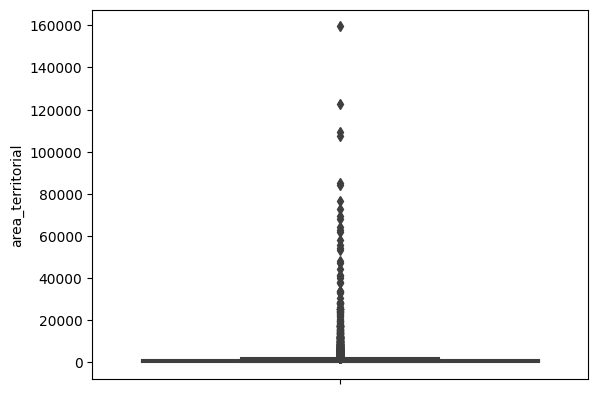

In [76]:
import seaborn as sns
sns.boxplot(
    data = cidades,
    y='area_territorial',
)

In [99]:
group = cidades.groupby('uf')['area_territorial'].sum().reset_index()

group = group.apply(lambda row: row[group['uf'].isin(['MS','CE', 'RR'])])


group
# group = group['uf'].isin(['AC', 'AL'])
# group

,uf,area_territorial
5,CE,148531.535
11,MS,357145.534
21,RR,223644.527
